# Electric Vehicle Population

### Project Content 
1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables In Dataset](#3)
2. [Data Preparation and Exploration](#4)    
    * 2.1 [Required Python Libraries](#5)
    * 2.2 [Loading the Dataset](#6)
    * 2.3 [Initial analysis on the dataset](#7)
3. [Data Preprocessing](#8)    
    * 3.1 [Examining Missing Values](#9)
    * 3.2 [Examining Duplicated Values](#10) 
    * 3.3 [Handling Categorical Variables](#10.1)
4. [Visualizing the Data](#11)   
    * 4.1 [Finding outliers](#12)
    * 4.2 [Correlation Heatmap for Numeric Columns](#13)
    * 4.3 [Data Visualization: Exploring Categorical Features](#14)
    

### **1.** Introduction <a id = 1></a>

#### **1.1** Examining the Project Topic <a id = 2 ></a> 

#### What is Electric Vehicles ? 

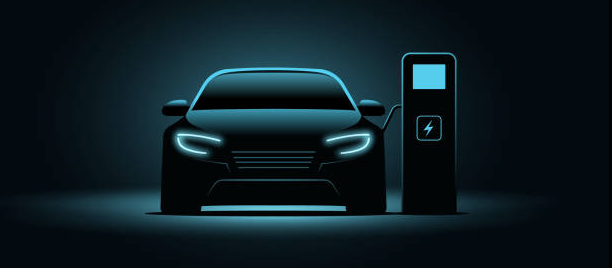

* **Definition**: 
    * Electric vehicles (EVs) are automobiles powered by electric motors, utilizing rechargeable batteries or fuel cells as their primary source of energy.
    * Unlike traditional internal combustion engine vehicles that rely on gasoline or diesel, EVs operate without emitting tailpipe pollutants, offering a cleaner and more environmentally friendly mode of transportation.

#### What are the advantages of using electric vehicles?

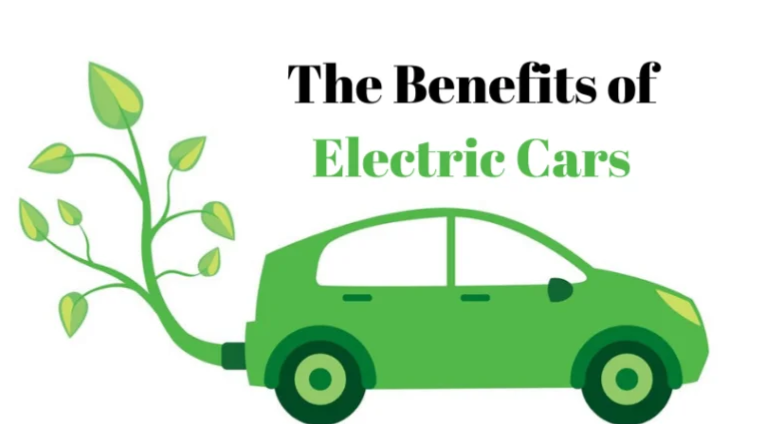

* **Benefits**:

    * Environmental Benefits: Lower emissions, reducing air pollution and greenhouse gases.
    * Energy Efficiency: More efficient motors result in reduced energy consumption.
    * Lower Operating Costs: Less maintenance and lower fuel costs compared to traditional vehicles.

#### What are the Challenges of using electric vehicles?

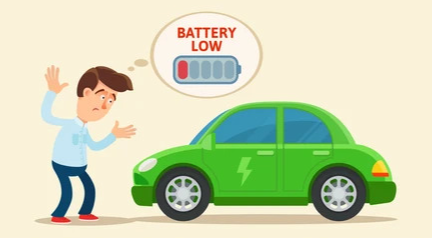

* **Challenges**:

    * Range Limitations: Some EVs have limited driving ranges.
    * Charging Infrastructure: Availability of charging stations varies.
    * Upfront Cost: Initial purchase price may be higher, though decreasing over time.

#### **1.2** Recognizing Variables In Dataset <a id = 3 ><a/> 

1. **VIN**: A Vehicle Identification Number (VIN) is the identifying code for a specific automobile.
2. **County**: Country where it is Manufactured.
3. **City** : location of Company that manufactures Electric Cars.
4. **state** : The administrative division within the country where the vehicle is manufactured. 
5. **Postal Code**: Pin code is the post office numbering code system used by the postal service.
6. **Model Year**: a year in which the car was manufactured.
7. **Make** : Name of Company.
8. **Model**: A vehicle identification number (VIN) is a unique, 17-digit code specific to every vehicle.
9. **Electric Vehicle Type**: When talking about EVs, we generally refer to three main types of electric vehicles: hybrid electric vehicles (HEV), plug-in hybrid electric vehicles (PHEV), and battery electric vehicles (BEV).
10. **Clean Alternative Fuel Vehicle**: Vegetable oils, such as palm, soybean, sunflower, peanut, and olive, as alternative fuels can be used for diesel engines. As an alternative fuel, vegetable oil is one of the renewable fuels.
11. **Electric Range** : All-electric vehicles can typically go between 110 and over 300 miles on a single charge. PHEVs can typically go 15–60 miles on battery power alone; the fuel tank capacity determines their overall range because the engine kicks in when the battery is depleted.
12. **Base MSRP** : Manufacturers set a base price for a car or vehicle without add-on products or features. The Manufacturer's Suggested Retail Price (MSRP) is the base price plus additional features.
13. **Legislative District** : While the Legislature of every State shall consist of the Governor and the State Legislature, in some of the States, the Legislature shall consist of two Houses, namely, the Legislative Assembly and the Legislative Council, while in the rest, there shall be only one House, namely the legislative assembly.
14. **DOL Vehicle ID** : DOL Vehicle ID. A unique identification number for each vehicle is present in the Transactions dataset. Transactions done on the same vehicle will have the same DOL Vehicle ID.
15. **Vehicle Location** : In cases where the vehicle was designed for electric motors, they are generally located at the front and/or rear between the wheels. There are short half-shafts connecting the output of the motors to the wheels.
16. **Electric Utility** : A corporation, person, agency, authority, or other legal entity or instrumentality aligned with distribution facilities for delivery of electric energy for use primarily by the public.
17. **2020 Census Tract**: Census tracts are relatively permanent small-area geographic divisions of a county or statistically equivalent entity defined for the tabulation and presentation of data from the decennial census and selected other statistical programs

#### **2.** Data Preparation and Exploration <a id = 4 ><a/>

#### 2.1 Required Python Libraries <a id = 5 ><a/>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### **2.2** Loading the Dataset <a id = 6 ><a/> 

In [3]:
df=pd.read_csv('/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv')


In [4]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10


#### **2.3** Initial analysis on the dataset <a id = 7 ><a/>

In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [6]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10
166799,5YJSA1E27H,Pierce,Gig Harbor,WA,98332.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,26.0,169045789,POINT (-122.589645 47.342345),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [7]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (166800, 17)


* We printed the shape of the dataset using **df.shape** to understand its dimensions, specifically the number of rows and columns. This information is valuable for gaining insights into the size of the dataset and understanding its overall structure, which is essential for data preprocessing, analysis, and modeling tasks.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

* After utilizing **df.info()**, we gained insights into various aspects of the DataFrame, including the data types (dtype) of each column, which comprise primarily of object for textual data, float64 for floating-point numbers, and int64 for integer values. Additionally, we obtained information on the count of non-null values for each column, facilitating initial data assessment and preprocessing.

In [9]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166795.000000,166800.000000,166800.000000,166800.000000,166440.000000,1.668000e+05,1.667950e+05
mean,98173.713750,2020.341793,61.508993,1152.723171,29.178941,2.172420e+08,5.297709e+10
std,2442.584415,3.001465,93.271747,8661.081091,14.853534,7.727458e+07,1.569754e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790741e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244045e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513421e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


*  **df.describe()** gives us useful information about numerical columns in the DataFrame, like how many data points we have, the average, the spread of values, and the range from smallest to largest. It helps us quickly understand what our data looks like and if there are any unusual values.

In [10]:
df.drop(["Base MSRP","VIN (1-10)", "2020 Census Tract"],axis=1,inplace=True)

*  We removed the "Base MSRP" and "VIN (1-10)" columns from the DataFrame using **df.drop()** because they are not relevant for your analysis or modeling purposes. This reduction in features simplifies the dataset, making it easier to focus on the key variables that are important for your specific objectives.

In [11]:
# Rename the column
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Clean Alternative Fuel Vehicle (CAFV)'}, inplace=True)


In [12]:
df.head(1)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV),Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP


#### **3.** **Data Preprocessing** <a id = 8 ><a/> 

#### **3.1** Examining Missing Values <a id = 9 ></a> 

In [13]:
df.isnull().sum()

County                                     5
City                                       5
State                                      0
Postal Code                                5
Model Year                                 0
Make                                       0
Model                                      0
Electric Vehicle Type                      0
Clean Alternative Fuel Vehicle (CAFV)      0
Electric Range                             0
Legislative District                     360
DOL Vehicle ID                             0
Vehicle Location                          10
Electric Utility                           5
dtype: int64

* **We found that the 'Legislative District' column has 360 missing values. Since it's a lot and we can't fill in the missing info easily, we'll just remove this column from our analysis.**

In [14]:
df.drop(columns=['Legislative District'], inplace=True)
df.head(1)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV),Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility
0,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,1593721,POINT (-120.524012 46.5973939),PACIFICORP


In [15]:
df.isnull().sum()

County                                    5
City                                      5
State                                     0
Postal Code                               5
Model Year                                0
Make                                      0
Model                                     0
Electric Vehicle Type                     0
Clean Alternative Fuel Vehicle (CAFV)     0
Electric Range                            0
DOL Vehicle ID                            0
Vehicle Location                         10
Electric Utility                          5
dtype: int64

* **The few missing values we have in the dataset won't cause big problems.**

#### 3.2 Examining Duplicated Values <a id = 10 ><a/> 

In [16]:
df.duplicated().sum()

0

* We checked if there were any copies of the same data in our dataset, and we found none. This means our data is good and trustworthy, making our analysis reliable.

#### **3.3 Handling Categorical Variables** <a id = 10.1 ><a/> 

*  You can use **LabelEncoder from sklearn.preprocessing** to convert the categorical variables in the columns "**Electric Vehicle Type**", "**Clean Alternative Fuel Vehicle (CAFV)**," and "**Electric Utility**" into numerical form. This ensures compatibility with machine learning algorithms and simplifies data processing, enhancing model performance. Additionally, it changes categorical values to 0s and 1s, improving interpretability.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variables into numerical form
df['Electric Vehicle Type'] = label_encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV)'] = label_encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV)'])




In [18]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV),Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility
0,Yakima,Yakima,WA,98902.0,2014,FIAT,500,0,0,87,1593721,POINT (-120.524012 46.5973939),PACIFICORP
1,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,0,0,200,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC
2,King,Renton,WA,98058.0,2023,BMW,330E,1,2,20,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,0,1,0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC
4,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,0,0,322,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [19]:
df['Electric Vehicle Type'].unique()

array([0, 1])

In [20]:
df['Clean Alternative Fuel Vehicle (CAFV)'].unique()

array([0, 2, 1])

#### **4. Visualizing the Data** <a id = 11 ><a/>

#### **4.1** Finding Outliers <a id = 12 ><a/>

* Finding outliers helps ensure our data is correct, makes our analysis more accurate, and improves the performance of our models.
* A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.

In [21]:
df.head(1)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV),Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility
0,Yakima,Yakima,WA,98902.0,2014,FIAT,500,0,0,87,1593721,POINT (-120.524012 46.5973939),PACIFICORP


In [22]:
df['Model Year'].unique()

array([2014, 2017, 2023, 2020, 2024, 2018, 2019, 2016, 2013, 2022, 2021,
       2015, 2012, 2011, 2002, 2008, 2010, 2000, 1998, 1999, 1997, 2003])

In [23]:
df['Electric Vehicle Type'].unique()

array([0, 1])

In [24]:
df['State'].unique()

array(['WA', 'BC', 'AE', 'VA', 'CA', 'NC', 'IL', 'MO', 'DC', 'MD', 'SC',
       'PA', 'NE', 'KY', 'TX', 'KS', 'GA', 'CO', 'FL', 'OR', 'AL', 'MI',
       'LA', 'NY', 'NJ', 'IN', 'NV', 'MN', 'OH', 'DE', 'CT', 'HI', 'NH',
       'OK', 'AZ', 'UT', 'MA', 'WY', 'AR', 'IA', 'RI', 'AK', 'ID', 'AP'],
      dtype=object)

In [25]:
fig = px.box(df, y="Make", x="State", title="Distribution of Car Brands Across States")

fig.show()

* After analyzing the distribution of car brands across states, it's evident that a few outliers are present in the data. However, these outliers are not uncommon in large datasets and do not significantly impact the overall analysis

In [26]:
df['Model Year'].unique()

array([2014, 2017, 2023, 2020, 2024, 2018, 2019, 2016, 2013, 2022, 2021,
       2015, 2012, 2011, 2002, 2008, 2010, 2000, 1998, 1999, 1997, 2003])

#### **4.2** Correlation Heatmap for Numeric Columns <a id = 13 ><a/>

* Understanding the Heatmap:
    * The heatmap visualizes the correlation coefficients between various numeric columns in your dataset.
    * Each cell represents the strength and direction of the correlation between two variables.
    * The color intensity indicates the degree of correlation:
        * Dark red: Strong positive correlation (close to 1).
        * Dark blue: Strong negative correlation (close to -1).
        * Lighter colors: Weaker correlations (closer to 0).

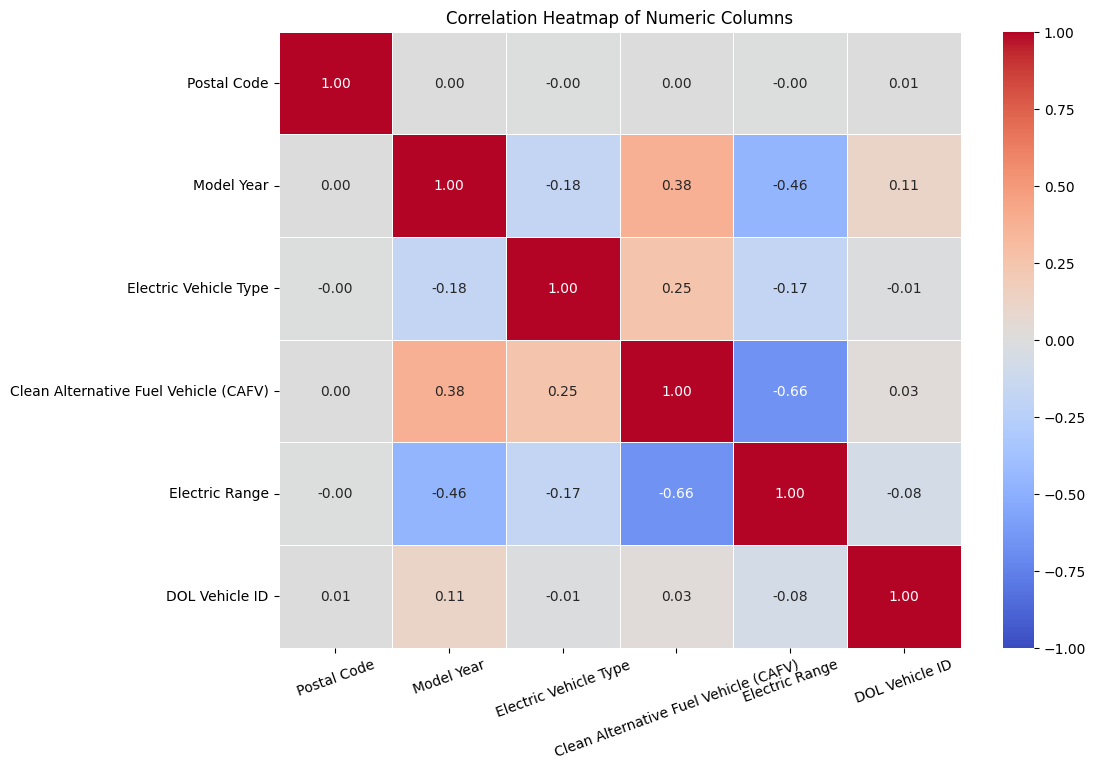

In [27]:
# Select only numeric columns (optional)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(11, 8))  # Adjust figure size as needed

# Customize the heatmap using various parameters from Seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display values within cells
    cmap='coolwarm',  # Color scheme
    fmt=".2f",  # Format values to two decimal places
    linewidths=0.5,  # Line width around cells
    vmin=-1,  # Minimum value for colormap
    vmax=1  # Maximum value for colormap
)

# Add labels and title
plt.title('Correlation Heatmap of Numeric Columns')
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.show()

* The heatmap displays the correlation coefficients between different numeric columns. Let’s analyze the results:

    * Good Correlation:
        * Model Year and Electric Vehicle Type have a positive correlation of 0.38, indicating a moderate positive relationship.
        
    * Bad Correlation:
        * Model Year and Clean Alternative Fuel Vehicle (CAFV) Eligibility exhibit a negative correlation of -0.46, suggesting a moderate negative relationship.
        * Several pairs have correlations close to zero, implying no significant relationships.


#### **4.3** Data Visualization: Exploring Categorical Features <a id = 14 ><a/>

In [ ]:
# Calculate the counts of each car make
car_counts = df["Make"].value_counts()

# Plotting the histogram
fig = px.histogram(df, x='Make', title="Counts of Cars")
fig.show()


* **In the histogram, Tesla stands out with the highest count of cars compared to other brands.**

In [29]:
ev_type_counts = df["Electric Vehicle Type"].value_counts()

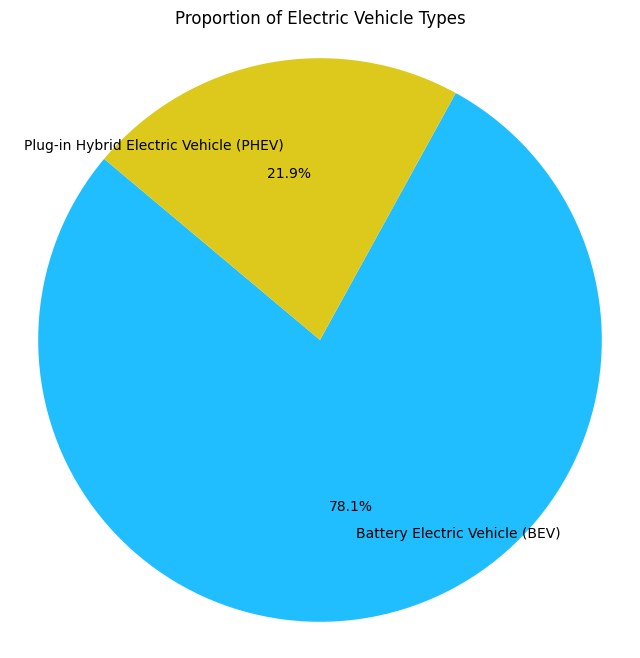

In [30]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
ev_type_counts = df['Electric Vehicle Type'].value_counts()

# Labels for each category
labels = ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Custom colors for each category
colors = ['#20BEFF','#DDC91B']  # Blue and yellow

# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(ev_type_counts, labels=labels, autopct='%1.1f%%', startangle=140, labeldistance=0.7, colors=colors)
plt.title('Proportion of Electric Vehicle Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


* **We can see that the usage of Battery Electric Vehicle (BEV) is much higher compared to Plug-in Hybrid Electric Vehicle (PHEV)**

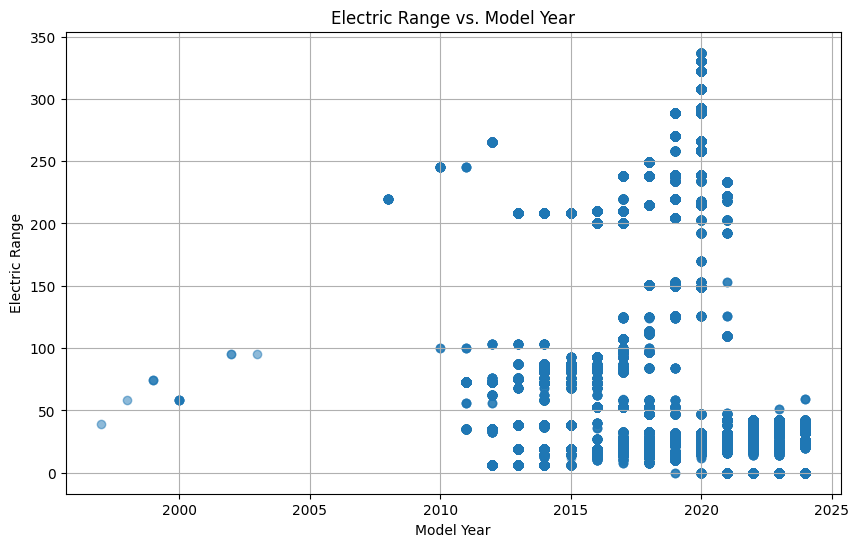

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Model Year'], df['Electric Range'], alpha=0.5)
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Electric Range vs. Model Year')
plt.grid(True)
plt.show()

* **We can observe that over time, there is an apparent increase in the electric range of vehicles, as indicated by the upward trend in Electric Range with respect to Model Year.**

In [32]:
df['Clean Alternative Fuel Vehicle (CAFV)'].unique()

array([0, 2, 1])

In [33]:
df['Model Year'].unique()

array([2014, 2017, 2023, 2020, 2024, 2018, 2019, 2016, 2013, 2022, 2021,
       2015, 2012, 2011, 2002, 2008, 2010, 2000, 1998, 1999, 1997, 2003])

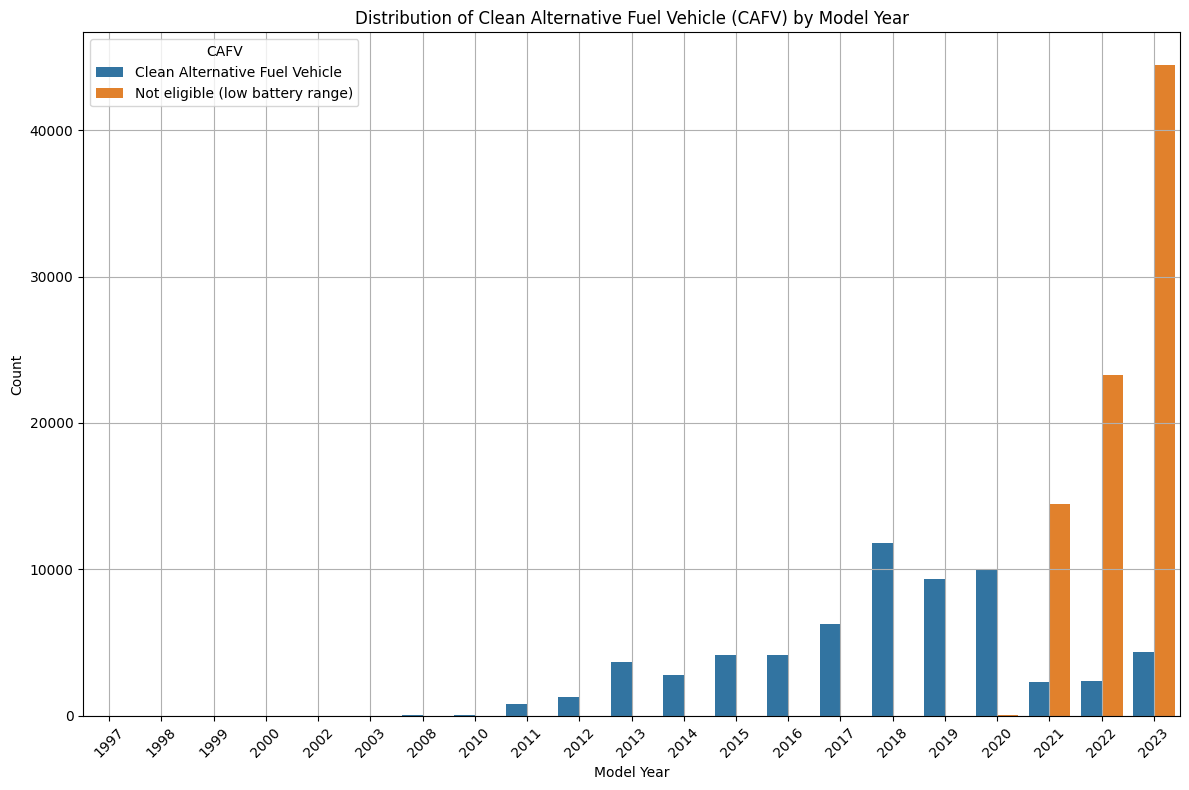

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to remove the year 2024
df_filtered = df[(df['Clean Alternative Fuel Vehicle (CAFV)'].isin([0, 1])) & (df['Model Year'] != 2024)]

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Create the clustered bar plot
sns.countplot(data=df_filtered, x='Model Year', hue='Clean Alternative Fuel Vehicle (CAFV)')

# Set the title and labels
plt.title('Distribution of Clean Alternative Fuel Vehicle (CAFV) by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Update the legend labels
plt.legend(title='CAFV', labels=['Clean Alternative Fuel Vehicle', 'Not eligible (low battery range)'])

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


* **The prevalence of vehicles classified as "Not eligible due to low battery range" appears to have risen over time. This trend might suggest an increased preference for electric cars with limited battery capacity, likely for shorter commutes or specific usage scenarios.**